## 📒 DBSCAN on Iris Dataset

### 🧠 DBSCAN Clustering on the Iris Dataset

In this notebook, we will:

1. Load and explore the classic Iris dataset 🌸
2. Preprocess the data with feature scaling ⚙️
3. Apply the DBSCAN clustering algorithm 🔍
4. Evaluate clustering performance using metrics like Adjusted Rand Index and Silhouette Score 📈
5. Visualize the clustering results 🖼️

Unlike traditional clustering methods like K-Means, DBSCAN can detect clusters of arbitrary shape and handle outliers. We will also compare the clustering labels to the true class labels to assess the quality of the clustering.


In [28]:
# 🔧 Import necessary libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score
def match_clusters_to_labels(true_labels, cluster_labels):
    labels = np.zeros_like(cluster_labels)
    for cluster in np.unique(cluster_labels):
        mask = cluster_labels == cluster
        most_common = mode(true_labels[mask], keepdims=True)[0][0]
        labels[mask] = most_common
    return labels


In [29]:
# 📥 Load the Iris dataset
iris = load_iris()
X = iris.data
y_true = iris.target
feature_names = iris.feature_names

In [30]:
# Convert to DataFrame for easier exploration
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y_true

In [31]:
# 👀 Preview the data
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [32]:
# 📊 Basic data analysis
print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None

Summary Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%           

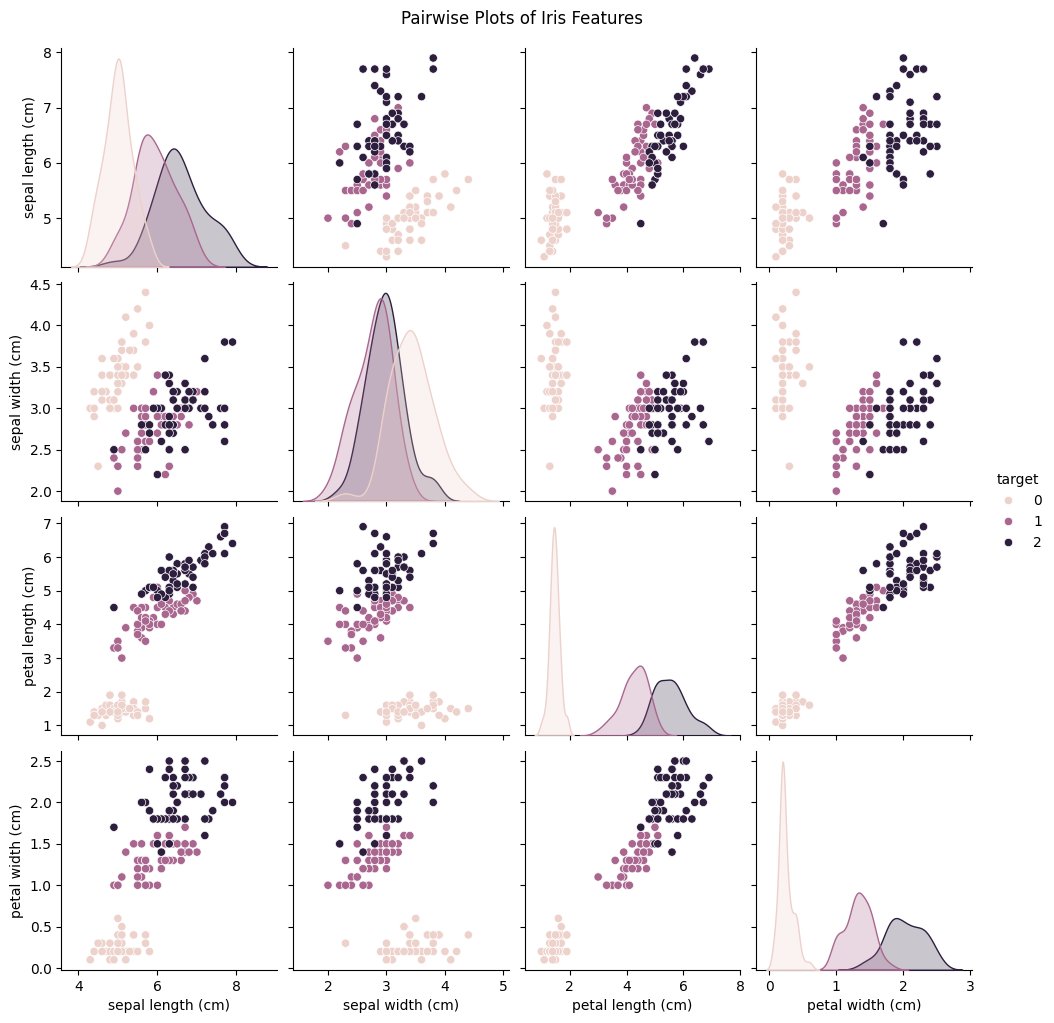

In [33]:
# 🎨 Pairplot for visual inspection
sns.pairplot(df, hue="target", diag_kind="kde")
plt.suptitle("Pairwise Plots of Iris Features", y=1.02)
plt.show()

In [34]:
# 📏 Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🧠 Apply DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=3)  # Parameters may need tuning
labels = dbscan.fit_predict(X_scaled)
labels = match_clusters_to_labels(y_true, labels)

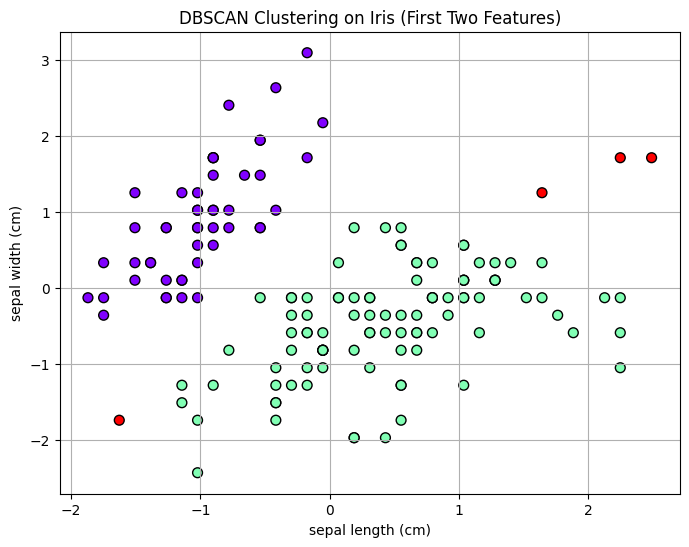

In [35]:
# 📊 Add clustering result to DataFrame
df['cluster'] = labels

# 🖼️ Visualize DBSCAN Clusters using two selected features (for simplicity)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='rainbow', s=50, edgecolor='k')
plt.title("DBSCAN Clustering on Iris (First Two Features)")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.grid(True)
plt.show()

In [36]:
# 📈 Evaluation Metrics

# 🟢 Adjusted Rand Index (compares predicted vs actual labels)
ari = adjusted_rand_score(y_true, labels)
print(f"Adjusted Rand Index (ARI): {ari:.3f}")

Adjusted Rand Index (ARI): 0.552
